In [29]:
# Step 1: Load and clean the dataset
import pandas as pd

# Load the dataset
file_path = '/Users/yunruyeh/Desktop/W9_health_project/training_tbl_5min_test3.csv'
data = pd.read_csv(file_path, delimiter=';')

In [31]:
data

,date_hora_sync,Insu_5min,Carbs_5min,Sgv_5min
0,20190714T012000,"0,02","0,08",86
1,20190714T012500,"0,02","0,08",85
2,20190714T013000,"0,14","0,08",86
3,20190714T013500,"0,02","0,08",85
4,20190714T014000,"0,02","0,08",84
...,...,...,...,...
22023,20190928T123500,"0,19",1,103
22024,20190928T124000,"0,19",1,105
22025,20190928T124500,"0,19",1,107
22026,20190928T125000,"0,19",1,109


In [33]:
# Cleaning and preparing the data
# Convert columns with commas to decimals and parse datetime
for col in ['Insu_5min', 'Carbs_5min']:
    data[col] = data[col].str.replace(',', '.').astype(float)
data['Sgv_5min'] = data['Sgv_5min'].astype(float)
data['date_hora_sync'] = pd.to_datetime(data['date_hora_sync'], format='%Y%m%dT%H%M%S')

# Display the first few rows of cleaned data
data.head()

,date_hora_sync,Insu_5min,Carbs_5min,Sgv_5min
0,2019-07-14 01:20:00,0.02,0.08,86.0
1,2019-07-14 01:25:00,0.02,0.08,85.0
2,2019-07-14 01:30:00,0.14,0.08,86.0
3,2019-07-14 01:35:00,0.02,0.08,85.0
4,2019-07-14 01:40:00,0.02,0.08,84.0


In [35]:
import os
print(os.getcwd())



/Users/yunruyeh/Desktop/W9_health_project


In [37]:
import os
print(os.path.exists(file_path))


True


In [39]:
# Step 2: Filter data for the specified date range
# Filter for the range 01-08-2019 to 30-08-2019
filtered_data = data[(data['date_hora_sync'] >= '2019-08-01') & (data['date_hora_sync'] <= '2019-08-30')]

# Display the first few rows of the filtered dataset
filtered_data.head()


,date_hora_sync,Insu_5min,Carbs_5min,Sgv_5min
5168,2019-08-01 00:00:00,0.36,0.9,80.0
5169,2019-08-01 00:05:00,0.36,0.9,80.0
5170,2019-08-01 00:10:00,0.36,0.9,79.0
5171,2019-08-01 00:15:00,0.36,0.0,76.0
5172,2019-08-01 00:20:00,0.00,0.0,75.0


In [41]:
filtered_data

,date_hora_sync,Insu_5min,Carbs_5min,Sgv_5min
5168,2019-08-01 00:00:00,0.36,0.9,80.0
5169,2019-08-01 00:05:00,0.36,0.9,80.0
5170,2019-08-01 00:10:00,0.36,0.9,79.0
5171,2019-08-01 00:15:00,0.36,0.0,76.0
5172,2019-08-01 00:20:00,0.00,0.0,75.0
...,...,...,...,...
13516,2019-08-29 23:40:00,0.52,0.0,114.0
13517,2019-08-29 23:45:00,0.52,0.0,115.0
13518,2019-08-29 23:50:00,0.52,0.0,114.0
13519,2019-08-29 23:55:00,0.52,0.0,112.0


In [43]:
# Step 3: Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Define features and target
X = filtered_data[['Carbs_5min', 'Sgv_5min']]  # Features
y = filtered_data['Insu_5min']  # Target

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6682, 2), (1671, 2), (6682,), (1671,))

In [45]:
# Step 4: Apply Linear Regression
# Initialize the Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on the test set
linear_predictions = linear_model.predict(X_test)

# Calculate performance metrics
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Display results
print(f"Linear Regression Mean Squared Error: {linear_mse}")
print(f"Linear Regression R-squared: {linear_r2}")


Linear Regression Mean Squared Error: 0.019886274877278974
Linear Regression R-squared: 0.3790653489035889


In [47]:
# Step 4: Apply Random Forest Regression
# Initialize the Random Forest Regresson
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate performance metrics
rf_mse = mean_squared_error(y_test, random_forest_predictions)
rf_r2 = r2_score(y_test, random_forest_predictions)

# Display results
print(f"Random Forest Regression Mean Squared Error: {rf_mse}")
print(f"Random Forest Regression R-squared: {rf_r2}")

Random Forest Regression Mean Squared Error: 0.019347432564749762
Random Forest Regression R-squared: 0.3958903131259526


In [29]:
!pip install scikit-learn==0.22.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 156.6 kB/s eta 0:00:0000:0100:03
  Preparing metadata (setup.py) ... one
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [11 lines of output]
      /private/var/folders/_6/br1hrvkn6x9f7l4sfjq8d0g40000gn/T/pip-install-6925rq51/scikit-learn_22783f1c0cc5475a949fc357bdee6bd4/setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import parse_version
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/_6/br1hrvkn6x9f7l4sfjq8d0g40000gn/T/pip-install-6925rq51/scikit-learn_22783f1c0cc5475a949fc357bdee6bd4/setup.py", line 303, in <module>
          setup_package()
        File "/

In [49]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [51]:
!pip install sklearn-rulefit

ERROR: Could not find a version that satisfies the requirement sklearn-rulefit (from versions: none)
ERROR: No matching distribution found for sklearn-rulefit


In [53]:
# Step 4: Apply Cubist Regression
# Step 4: Apply Rule-Based Regression (Cubist-like)
# Initialize the RuleFit model
from rulefit import RuleFit
from sklearn.metrics import mean_squared_error, r2_score

rulefit_model = RuleFit()

# 初始化 RuleFit 模型
rulefit_model = RuleFit()

# 訓練模型
rulefit_model.fit(X_train, y_train)

# 在測試集上進行預測
rulefit_predictions = rulefit_model.predict(X_test)

# 計算性能指標
rulefit_mse = mean_squared_error(y_test, rulefit_predictions)
rulefit_r2 = r2_score(y_test, rulefit_predictions)

# 顯示結果
print(f"RuleFit Model Mean Squared Error: {rulefit_mse}")
print(f"RuleFit Model R-squared: {rulefit_r2}")

InvalidIndexError: (slice(None, None, None), 0)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(6682, 2)
(1671, 2)
(6682,)
(1671,)


In [27]:
# 訓練模型
rulefit_model.fit(X_train, y_train)

# 在測試集上進行預測
rulefit_predictions = rulefit_model.predict(X_test)

# 計算性能指標
rulefit_mse = mean_squared_error(y_test, rulefit_predictions)
rulefit_r2 = r2_score(y_test, rulefit_predictions)

# 顯示結果
print(f"RuleFit Model Mean Squared Error: {rulefit_mse}")
print(f"RuleFit Model R-squared: {rulefit_r2}")


delete estimators_


InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
# Step 4: Apply M5-like Regression using Decision Tree
# Initialize the Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

m5_model = DecisionTreeRegressor(random_state=42)

# Train the model
m5_model.fit(X_train, y_train)

# Predict on the test set
m5_predictions = m5_model.predict(X_test)

# Calculate performance metrics
m5_mse = mean_squared_error(y_test, m5_predictions)
m5_r2 = r2_score(y_test, m5_predictions)

# Display results
print(f"M5-like Regression Mean Squared Error: {m5_mse}")
print(f"M5-like Regression R-squared: {m5_r2}")



Comparison of Regression Models:
                Model  Mean Squared Error  R-squared
0   Linear Regression            0.019886   0.379065
1       Random Forest            0.019347   0.395890
2  M5-like Regression            0.021474   0.329474


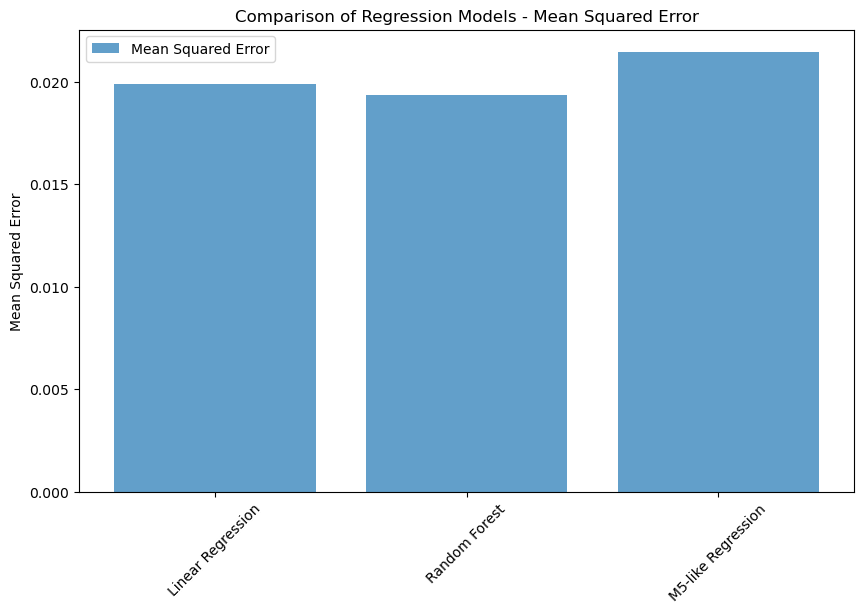

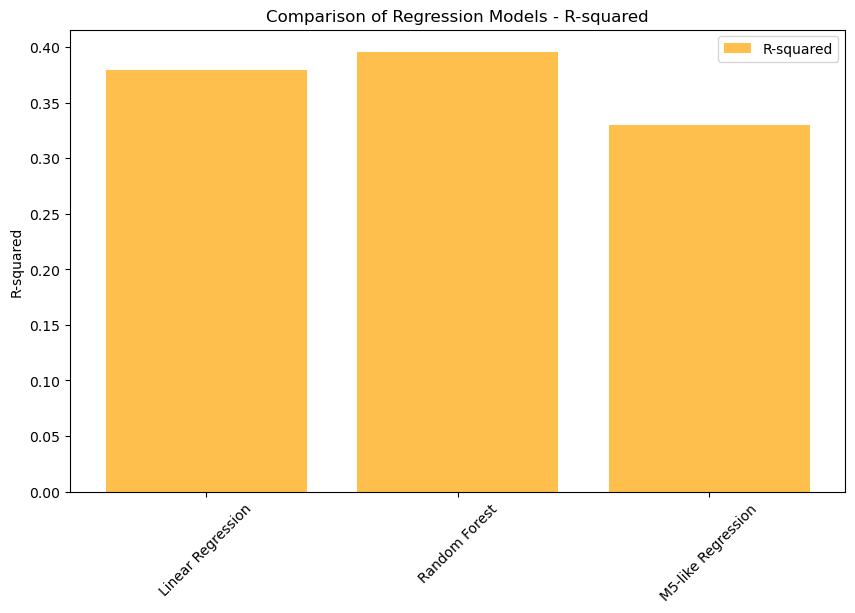

In [41]:
# Step 5: Compare all models
# Compile results into a dictionary
import matplotlib.pyplot as plt

results = {
    'Model': ['Linear Regression', 'Random Forest', 'M5-like Regression'],
    'Mean Squared Error': [linear_mse, rf_mse,  m5_mse],
    'R-squared': [linear_r2, rf_r2, m5_r2]
}

# Convert results to a DataFrame for display
results_df = pd.DataFrame(results)

# Display the results
print("\nComparison of Regression Models:")
print(results_df)

# Visualize the comparison
plt.figure(figsize=(10, 6))

# Bar plot for Mean Squared Error
plt.bar(results['Model'], results['Mean Squared Error'], alpha=0.7, label='Mean Squared Error')
plt.title('Comparison of Regression Models - Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Bar plot for R-squared
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['R-squared'], alpha=0.7, color='orange', label='R-squared')
plt.title('Comparison of Regression Models - R-squared')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.legend()
plt.show()
